In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import statistics
import plotly.express as px
import researchpy as rp
import pylab
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from IPython.display import Markdown, display
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches = pd.read_csv("matches_bundesliga_v2.csv", index_col=0)

In [4]:
matches.shape

(3060, 30)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
game_counts = matches["team"].value_counts()

In [7]:
teams = matches["team"].unique()

In [8]:
teams

array(['Bayern Munich', 'Dortmund', 'RB Leipzig', 'Union Berlin',
       'Freiburg', 'Bayer Leverkusen', 'Eintracht Frankfurt', 'Wolfsburg',
       'Mainz 05', 'Monchengladbach', 'Koln', 'Hoffenheim',
       'Werder Bremen', 'Bochum', 'Augsburg', 'Stuttgart', 'Schalke 04',
       'Hertha BSC', 'Arminia', 'Greuther Furth', 'Dusseldorf',
       'Paderborn 07', 'Hannover 96', 'Nurnberg'], dtype=object)

In [9]:
game_counts

Bayern Munich          170
Augsburg               170
RB Leipzig             170
Hertha BSC             170
Freiburg               170
Bayer Leverkusen       170
Eintracht Frankfurt    170
Wolfsburg              170
Mainz 05               170
Monchengladbach        170
Hoffenheim             170
Dortmund               170
Schalke 04             136
Stuttgart              136
Werder Bremen          136
Koln                   136
Union Berlin           136
Bochum                  68
Arminia                 68
Dusseldorf              68
Greuther Furth          34
Paderborn 07            34
Hannover 96             34
Nurnberg                34
Name: team, dtype: int64

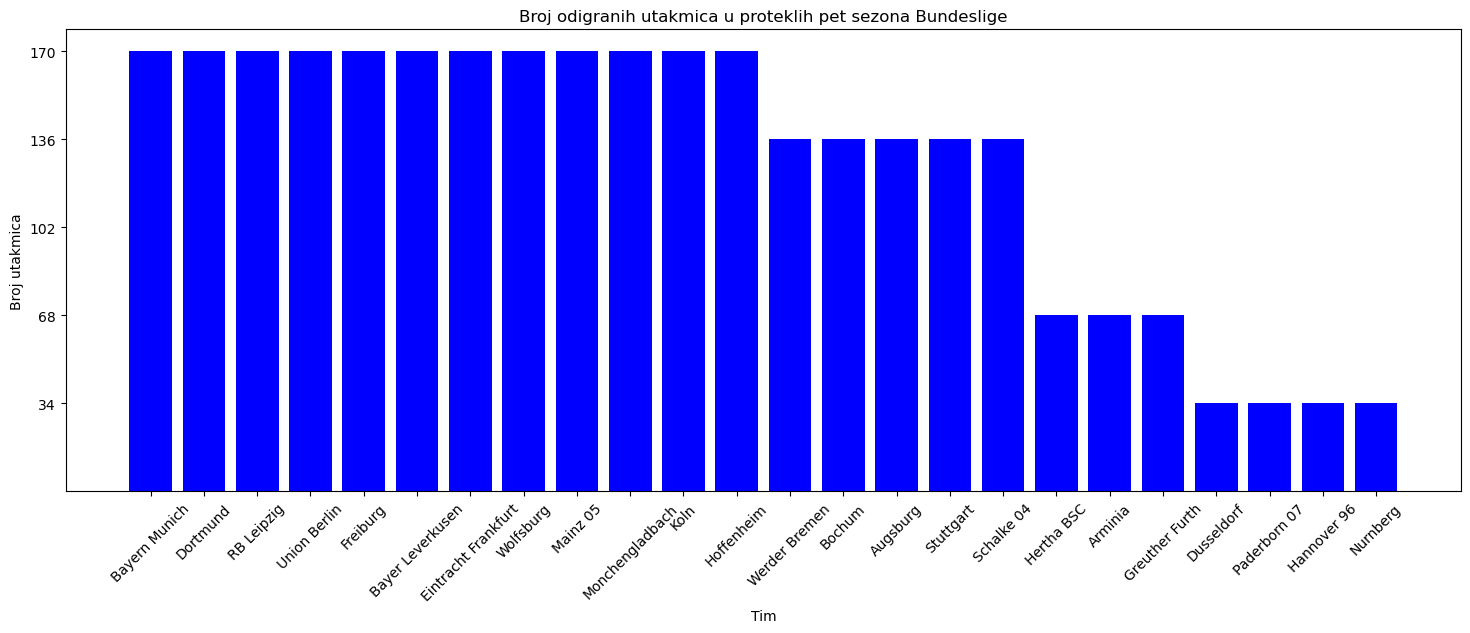

In [10]:
# Create the bar plot
plt.figure(figsize=(18, 6))
plt.bar(teams, game_counts, color='blue')

# Customize the plot
plt.title('Broj odigranih utakmica u proteklih pet sezona Bundeslige')
plt.xlabel('Tim')
plt.ylabel('Broj utakmica')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)
plt.yticks([170, 136, 102, 68, 34])

# Display the plot
plt.show()


In [11]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 2
xga                2
poss               0
attendance       744
captain            0
formation          0
referee            0
match report       0
notes           3058
sh                 0
sot                0
dist               3
fk                 2
pk                 0
pkatt              0
season             0
team               0
wwages            34
awages            34
age                0
dtype: int64

In [12]:
matches["round"].value_counts()

Matchweek 1     90
Matchweek 26    90
Matchweek 20    90
Matchweek 21    90
Matchweek 22    90
Matchweek 23    90
Matchweek 24    90
Matchweek 25    90
Matchweek 27    90
Matchweek 2     90
Matchweek 28    90
Matchweek 29    90
Matchweek 30    90
Matchweek 31    90
Matchweek 32    90
Matchweek 33    90
Matchweek 19    90
Matchweek 18    90
Matchweek 17    90
Matchweek 16    90
Matchweek 15    90
Matchweek 14    90
Matchweek 13    90
Matchweek 12    90
Matchweek 11    90
Matchweek 10    90
Matchweek 9     90
Matchweek 8     90
Matchweek 7     90
Matchweek 6     90
Matchweek 5     90
Matchweek 4     90
Matchweek 3     90
Matchweek 34    90
Name: round, dtype: int64

In [13]:
del matches["comp"]
del matches["notes"]

In [14]:
matches.loc[matches.attendance.isna()==True, 'attendance'] = round(matches.attendance.mean(), 0)

In [15]:
matches.loc[matches.dist.isna()==True, 'dist'] = round(matches.dist.mean(), 0)

In [16]:
matches.loc[matches.wwages.isna()==True, 'wwages'] = round(matches.wwages.mean(), 0)

In [17]:
matches.loc[matches.awages.isna()==True, 'awages'] = round(matches.awages.mean(), 0)

In [18]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-05,20:30,Matchweek 1,Fri,Away,W,6,1,Eint Frankfurt,4.0,0.9,63.0,51500.0,Manuel Neuer,4-4-2,Deniz Aytekin,Match Report,23.0,10.0,16.6,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
1,2022-08-14,17:30,Matchweek 2,Sun,Home,W,2,0,Wolfsburg,2.0,0.5,68.0,75000.0,Manuel Neuer,4-2-3-1,Harm Osmers,Match Report,24.0,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
2,2022-08-21,17:30,Matchweek 3,Sun,Away,W,7,0,Bochum,2.9,0.7,64.0,26000.0,Manuel Neuer,4-4-2,Daniel Siebert,Match Report,21.0,11.0,18.3,1.0,1.0,1.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
3,2022-08-27,18:30,Matchweek 4,Sat,Home,D,1,1,M'Gladbach,2.8,0.5,69.0,75000.0,Manuel Neuer,4-2-2-2,Daniel Schlager,Match Report,33.0,20.0,17.4,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
4,2022-09-03,15:30,Matchweek 5,Sat,Away,D,1,1,Union Berlin,1.5,0.3,74.0,22012.0,Manuel Neuer,4-2-3-1,Frank Willenborg,Match Report,21.0,6.0,18.1,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,2019-04-20,15:30,Matchweek 30,Sat,Away,L,0,2,Leverkusen,0.3,1.2,36.0,26405.0,Hanno Behrens,4-3-3,Guido Winkmann,Match Report,5.0,1.0,19.3,0.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3056,2019-04-28,18:00,Matchweek 31,Sun,Home,D,1,1,Bayern Munich,1.9,2.2,34.0,50000.0,Hanno Behrens,4-4-2,Tobias Stieler,Match Report,9.0,4.0,20.2,1.0,0.0,1.0,2019,Nurnberg,210904.0,10967000.0,24.9
3057,2019-05-04,15:30,Matchweek 32,Sat,Away,L,0,2,Wolfsburg,0.7,0.8,47.0,22512.0,Hanno Behrens,4-4-2,Daniel Siebert,Match Report,12.0,3.0,21.0,1.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3058,2019-05-11,15:30,Matchweek 33,Sat,Home,L,0,4,M'Gladbach,0.9,2.1,49.0,50000.0,Hanno Behrens,4-3-3,Frank Willenborg,Match Report,12.0,2.0,21.0,2.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9


In [19]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,wwages,awages,age
count,3060.000000,3060.000000,3058.000000,3058.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3058.000000,3060.000000,3060.000000,3060.000000,3.060000e+03,3.060000e+03,3060.000000
mean,1.571242,1.571242,1.487181,1.487181,50.000980,36394.804575,12.817320,4.450654,17.669281,0.436560,0.122222,0.152941,2021.000000,9.609934e+05,4.997166e+07,26.117778
std,1.362827,1.362827,0.851741,0.851741,11.187267,17509.195768,5.123926,2.554765,2.907320,0.651661,0.344142,0.381161,1.414445,9.391575e+05,4.883619e+07,1.003556
min,0.000000,0.000000,0.000000,0.000000,17.000000,100.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2019.000000,1.348080e+05,7.010000e+06,24.000000
25%,1.000000,1.000000,0.900000,0.900000,42.000000,25000.000000,9.000000,3.000000,15.700000,0.000000,0.000000,0.000000,2020.000000,4.123940e+05,2.144450e+07,25.600000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,36395.000000,12.000000,4.000000,17.500000,0.000000,0.000000,0.000000,2021.000000,7.272500e+05,3.781700e+07,26.100000
75%,2.000000,2.000000,2.000000,2.000000,58.000000,44538.000000,16.000000,6.000000,19.500000,1.000000,0.000000,0.000000,2022.000000,1.039423e+06,5.405000e+07,26.800000
max,8.000000,8.000000,5.600000,5.600000,83.000000,81365.000000,34.000000,20.000000,37.200000,4.000000,3.000000,3.000000,2023.000000,5.047500e+06,2.624700e+08,29.400000


In [20]:
matches_w = matches[matches["result"] == "W"]

In [21]:
matches_w

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-05,20:30,Matchweek 1,Fri,Away,W,6,1,Eint Frankfurt,4.0,0.9,63.0,51500.0,Manuel Neuer,4-4-2,Deniz Aytekin,Match Report,23.0,10.0,16.6,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
1,2022-08-14,17:30,Matchweek 2,Sun,Home,W,2,0,Wolfsburg,2.0,0.5,68.0,75000.0,Manuel Neuer,4-2-3-1,Harm Osmers,Match Report,24.0,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
2,2022-08-21,17:30,Matchweek 3,Sun,Away,W,7,0,Bochum,2.9,0.7,64.0,26000.0,Manuel Neuer,4-4-2,Daniel Siebert,Match Report,21.0,11.0,18.3,1.0,1.0,1.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
7,2022-09-30,20:30,Matchweek 8,Fri,Home,W,4,0,Leverkusen,1.9,0.8,62.0,75000.0,Manuel Neuer,4-2-3-1,Tobias Stieler,Match Report,20.0,9.0,16.6,2.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
9,2022-10-16,19:30,Matchweek 10,Sun,Home,W,5,0,Freiburg,2.1,0.3,66.0,75000.0,Joshua Kimmich,4-2-3-1,Sascha Stegemann,Match Report,16.0,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,2019-04-27,15:30,Matchweek 31,Sat,Home,W,1,0,Mainz 05,0.8,3.2,40.0,30400.0,Marvin Bakalorz,4-1-2-1-2◆,Sören Storks,Match Report,8.0,3.0,17.9,0.0,0.0,0.0,2019,Hannover 96,960993.0,49971658.0,26.3
3024,2019-05-11,15:30,Matchweek 33,Sat,Home,W,3,0,Freiburg,2.1,0.7,58.0,38100.0,Marvin Bakalorz,3-4-1-2,Robert Hartmann,Match Report,18.0,6.0,17.9,1.0,0.0,0.0,2019,Hannover 96,960993.0,49971658.0,26.3
3029,2018-09-22,15:30,Matchweek 4,Sat,Home,W,2,0,Hannover 96,1.7,0.7,55.0,36736.0,Hanno Behrens,4-3-3,Bastian Dankert,Match Report,15.0,6.0,20.1,1.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3031,2018-09-29,15:30,Matchweek 6,Sat,Home,W,3,0,Düsseldorf,2.2,1.1,39.0,36102.0,Hanno Behrens,4-3-1-2,Harm Osmers,Match Report,9.0,5.0,22.7,0.0,1.0,1.0,2019,Nurnberg,210904.0,10967000.0,24.9


In [22]:
formations = matches["formation"].unique()

In [23]:
formation_wins = matches_w["formation"].value_counts()

In [24]:
formation_wins

4-2-3-1       346
3-4-3         212
4-3-3         119
3-5-2          92
4-4-2          67
3-4-1-2        62
4-1-4-1        57
3-1-4-2        45
4-2-2-2        45
4-1-2-1-2◆     28
4-3-1-2        26
4-1-3-2        19
4-4-1-1        15
5-3-2          12
4-5-1           7
5-4-1           3
3-5-1-1         2
4-3-2-1         1
3-2-4-1         1
3-4-3◆          1
Name: formation, dtype: int64

In [25]:
avgage = pd.read_csv("avgage_bundesliga.csv", index_col=0)

In [26]:
wages = pd.read_csv("wages_bundesliga.csv", index_col=0)

[Text(0.5, 1.0, 'Distribucija prosječne starosti igrača u timovima Bundeslige')]

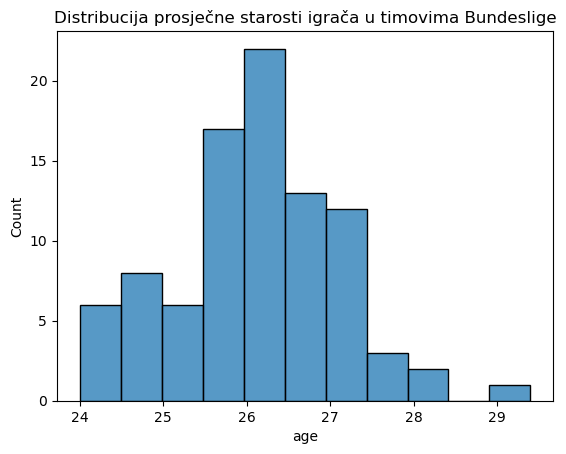

In [27]:
sns.histplot(data = avgage, x = 'age').set(title = 'Distribucija prosječne starosti igrača u timovima Bundeslige')

In [29]:
formations=['4-2-3-1', '3-4-3', '4-3-3', '3-5-2', '4-4-2', '3-4-1-2', '4-1-4-1', 'ostale']

In [30]:
formation_wins2 = [346, 212, 119, 92, 67, 62, 57, 205]

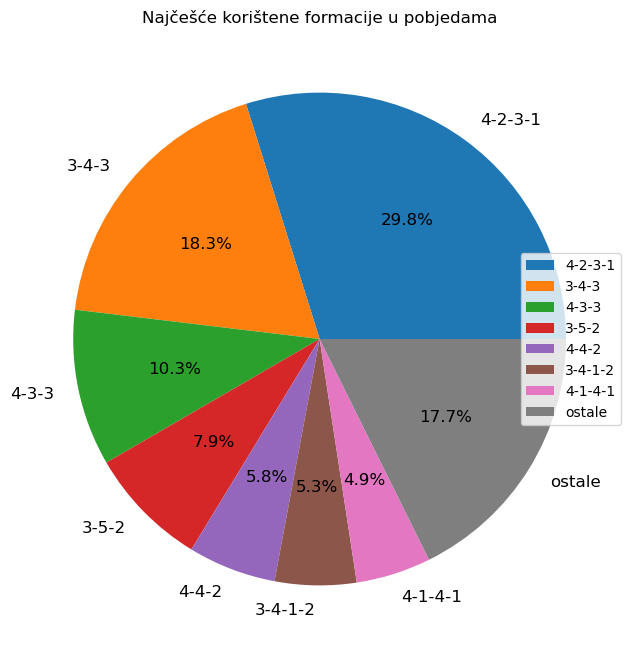

In [31]:
# Data
# Plotting
plt.figure(figsize=(8,8))
plt.pie(formation_wins2, labels=formations, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title("Najčešće korištene formacije u pobjedama")

# Legend
plt.legend(loc='right')

# plt.savefig("formations_bundesliga.png")

# Show the chart
plt.show()

In [32]:
teams = matches["team"].unique()

In [33]:
team_attendances = round(matches.groupby("team").attendance.mean(), 0)

In [34]:
teams.sort()

In [35]:
teams

array(['Arminia', 'Augsburg', 'Bayer Leverkusen', 'Bayern Munich',
       'Bochum', 'Dortmund', 'Dusseldorf', 'Eintracht Frankfurt',
       'Freiburg', 'Greuther Furth', 'Hannover 96', 'Hertha BSC',
       'Hoffenheim', 'Koln', 'Mainz 05', 'Monchengladbach', 'Nurnberg',
       'Paderborn 07', 'RB Leipzig', 'Schalke 04', 'Stuttgart',
       'Union Berlin', 'Werder Bremen', 'Wolfsburg'], dtype=object)

In [36]:
team_attendances

team
Arminia                25772.0
Augsburg               32075.0
Bayer Leverkusen       31569.0
Bayern Munich          47880.0
Bochum                 27981.0
Dortmund               49129.0
Dusseldorf             41374.0
Eintracht Frankfurt    38462.0
Freiburg               31728.0
Greuther Furth         19115.0
Hannover 96            40479.0
Hertha BSC             37871.0
Hoffenheim             31054.0
Koln                   37825.0
Mainz 05               31520.0
Monchengladbach        38818.0
Nurnberg               41595.0
Paderborn 07           30366.0
RB Leipzig             36397.0
Schalke 04             46276.0
Stuttgart              38529.0
Union Berlin           29620.0
Werder Bremen          40400.0
Wolfsburg              30122.0
Name: attendance, dtype: float64

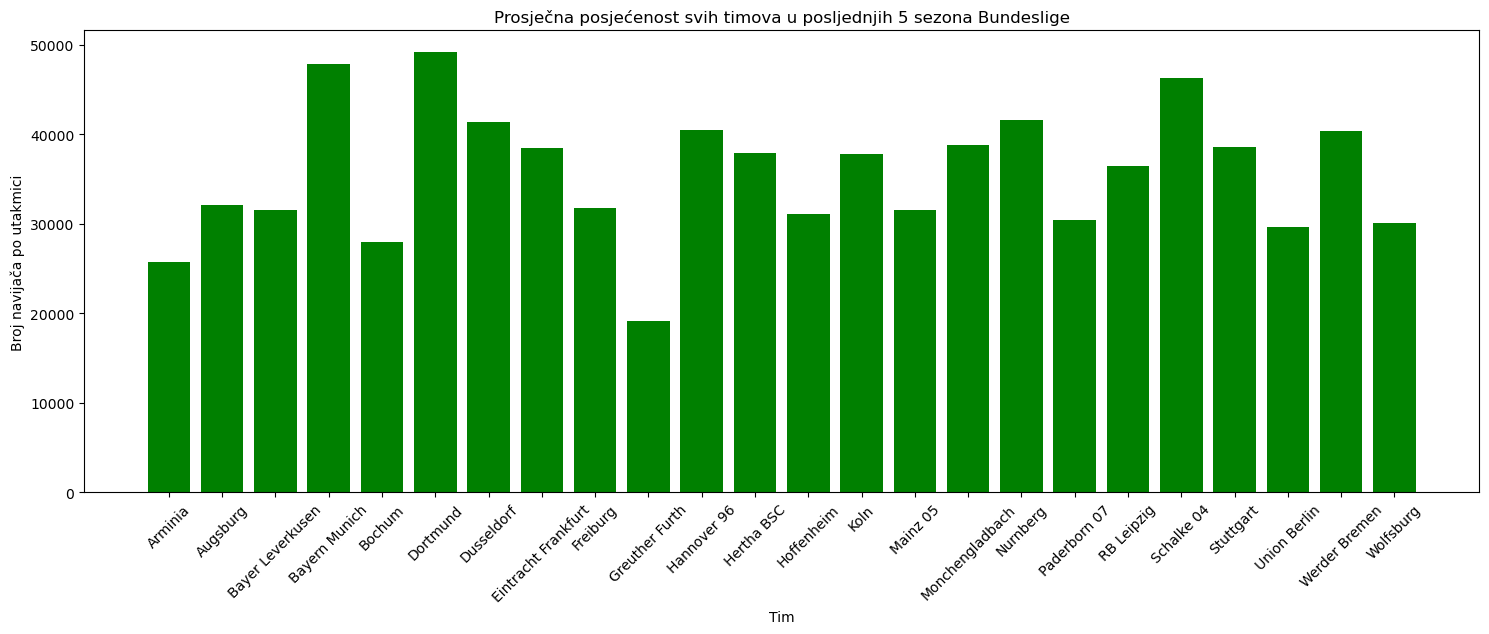

In [37]:
# Create the bar plot
plt.figure(figsize=(18, 6))
plt.bar(teams, team_attendances, color='green')

# Customize the plot
plt.title('Prosječna posjećenost svih timova u posljednjih 5 sezona Bundeslige')
plt.xlabel('Tim')
plt.ylabel('Broj navijača po utakmici')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)
# plt.yticks([170, 136, 102, 68, 34])

# Display the plot
plt.show()


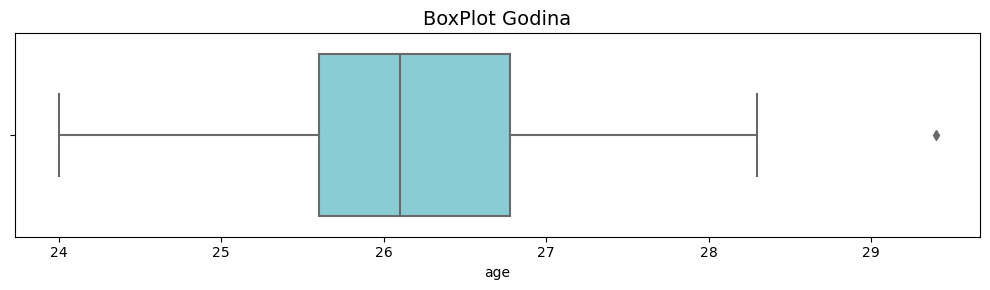

In [41]:
ax = plt.subplots(figsize=(10, 3)) #postavlja okvir
sns.boxplot(data = avgage, x = 'age', color = '#7ed6df')
# sns.stripplot(data = avgage, x = 'age', linewidth = 0.6, size = 3, color = '#be2edd') #baza
plt.title('BoxPlot Godina', fontsize = 14)
plt.tight_layout()
plt.show()

In [40]:
weekly_wages = round(matches.groupby("team").wwages.mean(), 1)

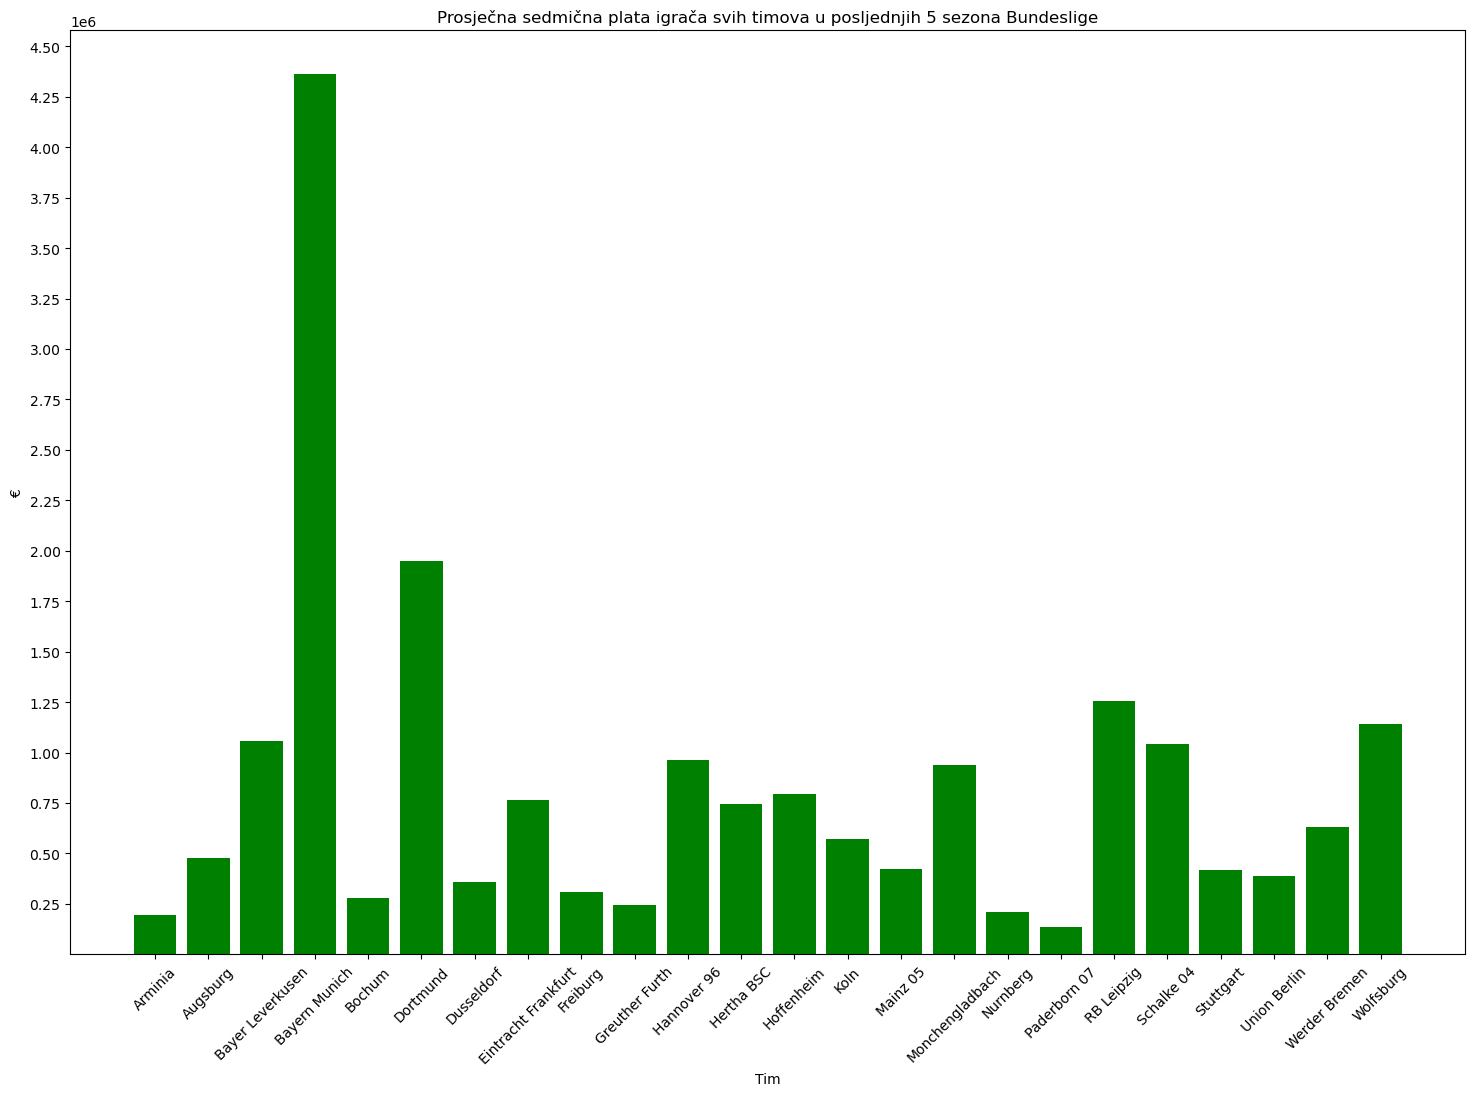

In [41]:
# Create the bar plot
plt.figure(figsize=(18, 12))
plt.bar(teams, weekly_wages, color='green')

# Customize the plot
plt.title('Prosječna sedmična plata igrača svih timova u posljednjih 5 sezona Bundeslige')
plt.xlabel('Tim')
plt.ylabel('€')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)
plt.yticks([250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000, 2750000, 3000000, 3250000,
           3500000, 3750000, 4000000, 4250000, 4500000])

# Display the plot
plt.show()


In [42]:
annual_wages = round(matches.groupby("team").awages.mean(), 1)

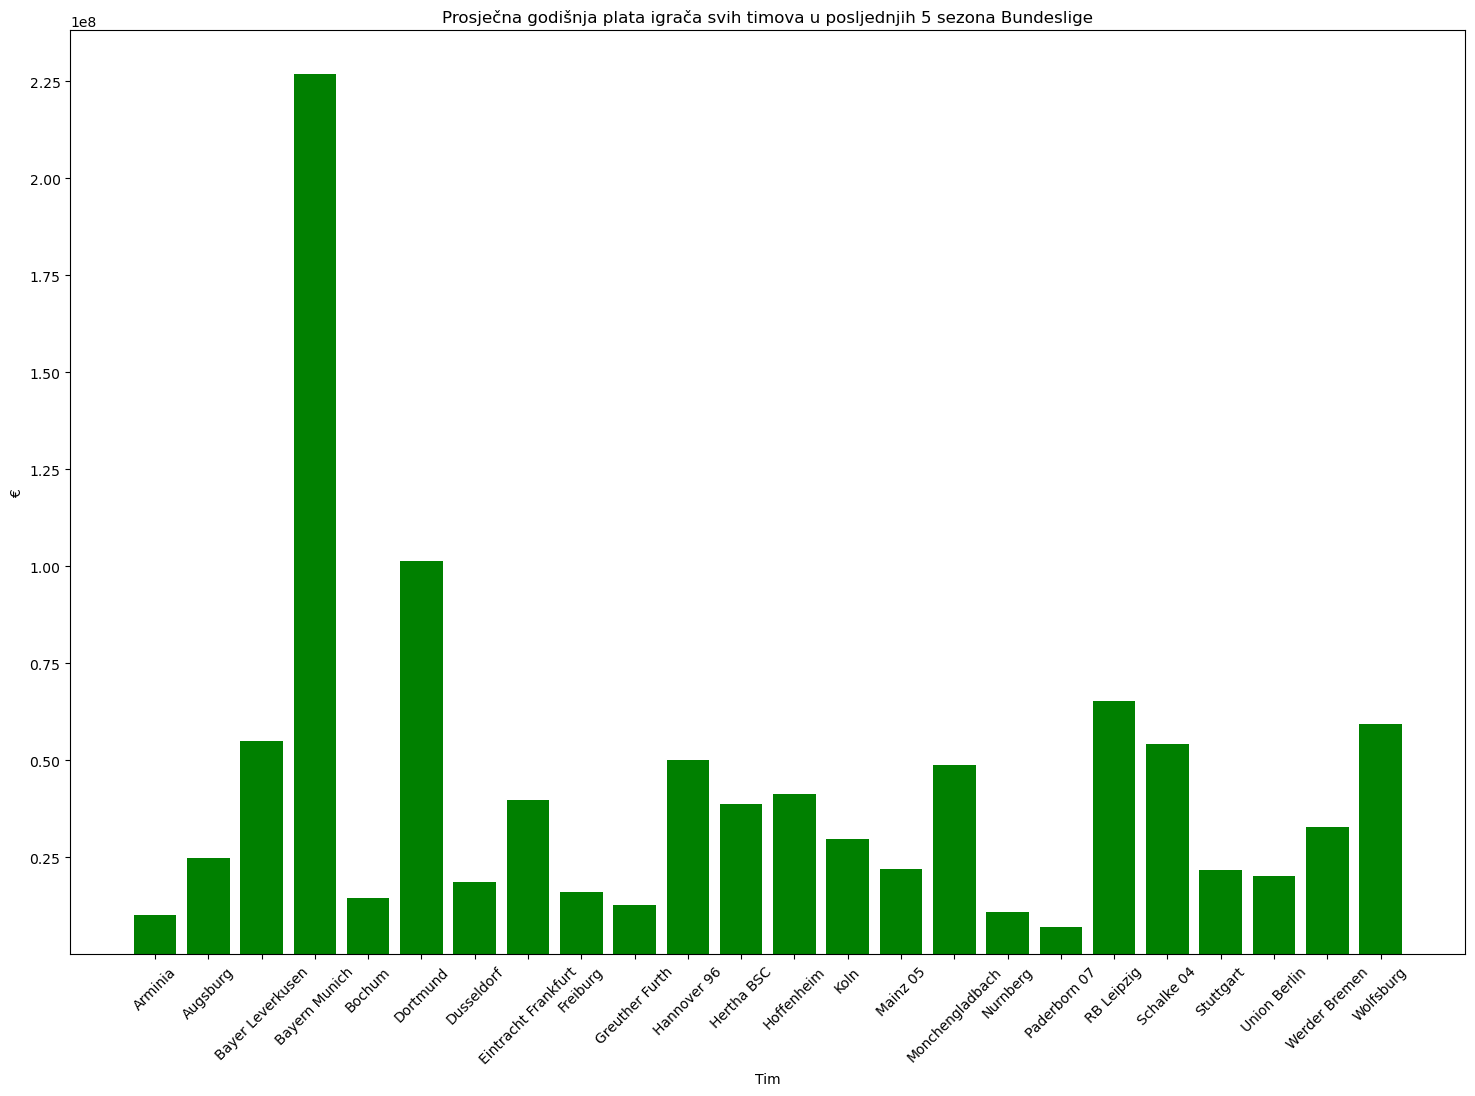

In [43]:
# Create the bar plot
plt.figure(figsize=(18, 12))
plt.bar(teams, annual_wages, color='green')

# Customize the plot
plt.title('Prosječna godišnja plata igrača svih timova u posljednjih 5 sezona Bundeslige')
plt.xlabel('Tim')
plt.ylabel('€')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)
plt.yticks([25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000, 200000000, 225000000])

# Display the plot
plt.show()


In [44]:
venue_wins = matches_w["venue"].value_counts()

In [45]:
venue_wins

Home    678
Away    482
Name: venue, dtype: int64

In [46]:
matches_w["venue"]

0       Away
1       Home
2       Away
7       Home
9       Home
        ... 
3022    Home
3024    Home
3029    Home
3031    Home
3052    Home
Name: venue, Length: 1160, dtype: object

[Text(0.5, 1.0, 'Raspodjela domaćih i gostujućih pobjeda'),
 Text(0, 0.5, 'Broj pobjeda'),
 Text(0.5, 0, 'Mjesto')]

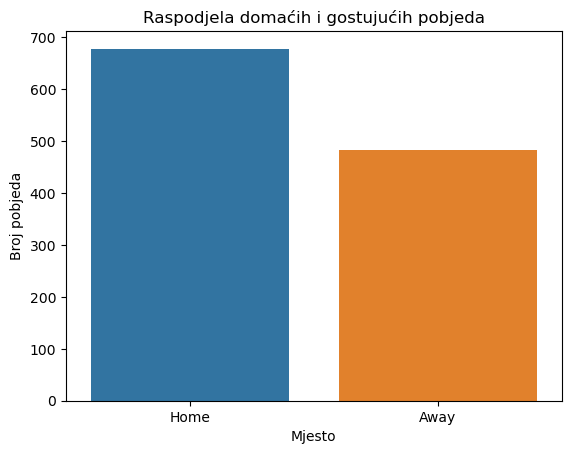

In [47]:
sns.barplot(data = matches_w['venue'].value_counts().reset_index(), x = 'index', y = 'venue').set(title = 'Raspodjela domaćih i gostujućih pobjeda', ylabel = 'Broj pobjeda', xlabel = 'Mjesto')